In [1]:
import pandas as pd #For reading the dataset and performing data munging 
import numpy as np # For performing cretain airthmetic operations
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For plotting different graphs and plots



In [3]:
import os
os.chdir("/media/prasad/Data/Kaggle_Hackathon/Toxic_Comments")


Train= pd.read_csv("train.csv")



In [4]:
Train.dtypes

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

In [5]:
x=Train.iloc[:,2:].sum()

rowsums=Train.iloc[:,2:].sum(axis=1)
Train['clean']=(rowsums==0)
#count number of clean entries
Train['clean'].sum()
print("Total comments = ",len(Train))
print("Total clean comments = ",Train['clean'].sum())
print("Total tags =",x.sum())


Total comments =  159571
Total clean comments =  143346
Total tags = 35098


Train['clean']= np.where(Train['clean']=True,1,0)

In [7]:
def preprocess(filename,columnname):
    
  # Counting the number of characters in the original comment
  filename['Count_characters']=filename[[columnname]].applymap(lambda x: len(x))
    
    
  # Counting the number of words in the original comment
  filename['Count_Words']=filename[[columnname]].applymap(lambda x: len(str.split(x)))
    
  
  # Importing stop words from NLTK and removing them from the comments and creating and simpler comment
  from nltk.corpus import stopwords
  stop = stopwords.words('english') 
  filename['Simple_comment_text'] = filename[columnname].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
  
  
  # Changing all the words in simple_comment_text into lower case 
  from textblob import Word 
  filename['Simple_comment_text'] = filename['Simple_comment_text'].apply(lambda x: " ".join([Word(word).lower() for word in x.split()]))
  

  # Converting the words into its root form (Lemmatizing it) 
  filename['Simple_comment_text'] = filename['Simple_comment_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
  
    
  # Counting special characters in the original comment
  filename['Count_Hash']=filename[[columnname]].applymap(lambda x: str.count(x, '#'))
  filename['Count_Star']=filename[[columnname]].applymap(lambda x: str.count(x, '*'))
  filename['Count_@']=filename[[columnname]].applymap(lambda x: str.count(x, '@'))
  

  # Checking whether the whole original comment was in Uppercase or not
  filename['Comment_isupper'] =filename[[columnname]].applymap(lambda x: x.isupper())
  
    
  # Finding the sentiment of the Original comment 
  from textblob import TextBlob
  filename['sentiment'] = filename[columnname].apply(lambda x: TextBlob(x).sentiment[0])
  return()

  
def wordcloud(filename,columnname):
   #Creating a function for Generating word cloud
  from wordcloud import WordCloud
  wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(filename[columnname]))

  plt.figure(figsize=(20,15))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()




In [8]:
%%time

preprocess(Train,'comment_text')



CPU times: user 2min 35s, sys: 228 ms, total: 2min 35s
Wall time: 2min 38s


()

In [9]:
Train.head(10)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,Count_characters,Count_Words,Simple_comment_text,Count_Hash,Count_Star,Count_@,Comment_isupper,sentiment
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,True,264,43,explanation why edits made username hardcore m...,0,0,0,False,0.136364
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,True,112,17,d'aww! he match background colour i'm seemingl...,0,0,0,False,0.287500
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,True,233,42,"hey man, i'm really trying edit war. it's guy ...",0,0,0,False,0.160000
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,True,622,113,""" more i can't make real suggestion improvemen...",1,0,0,False,0.200000
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,True,67,13,"you, sir, hero. any chance remember page that'...",0,0,0,False,0.000000
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,True,65,13,""" congratulation well, use tool well. · talk """,0,0,0,False,0.000000
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,False,44,8,cocksucker before you piss around on my work,0,0,0,True,0.000000
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,True,115,20,your vandalism matt shirvington article revert...,0,0,0,False,0.000000
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,True,472,83,"sorry word 'nonsense' offensive you. anyway, i...",0,0,0,False,-0.140000
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,True,70,12,alignment subject contrary dulithgow,0,0,0,False,-0.166667


Train.to_csv('New_train1.csv')

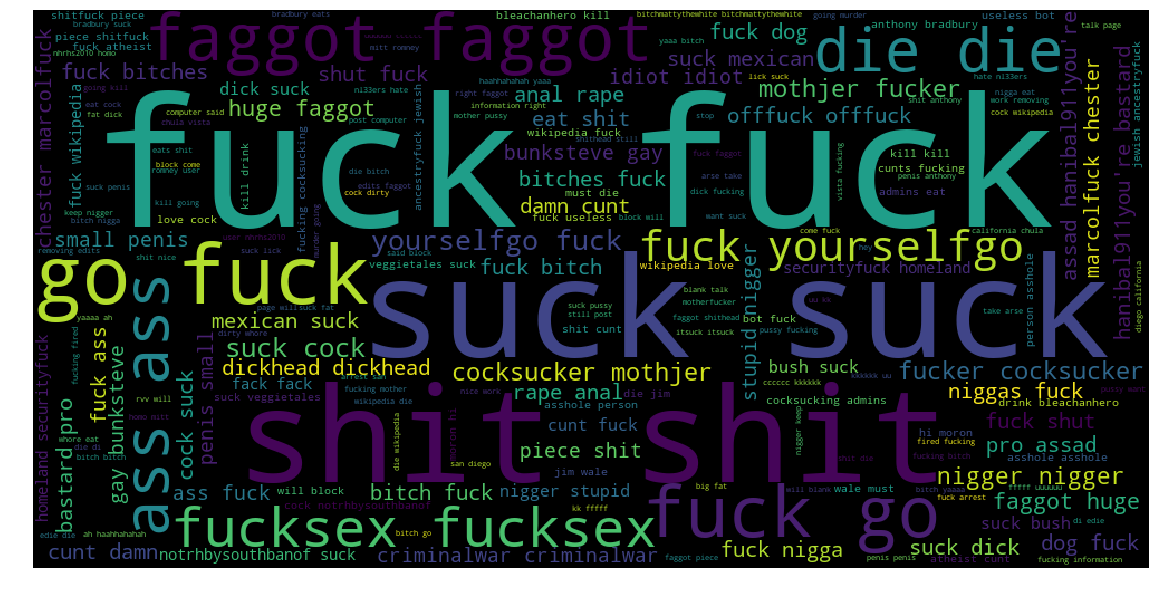

In [8]:
Sev_toxic=Train[Train.severe_toxic==1]

wordcloud(Sev_toxic,'Simple_comment_text')



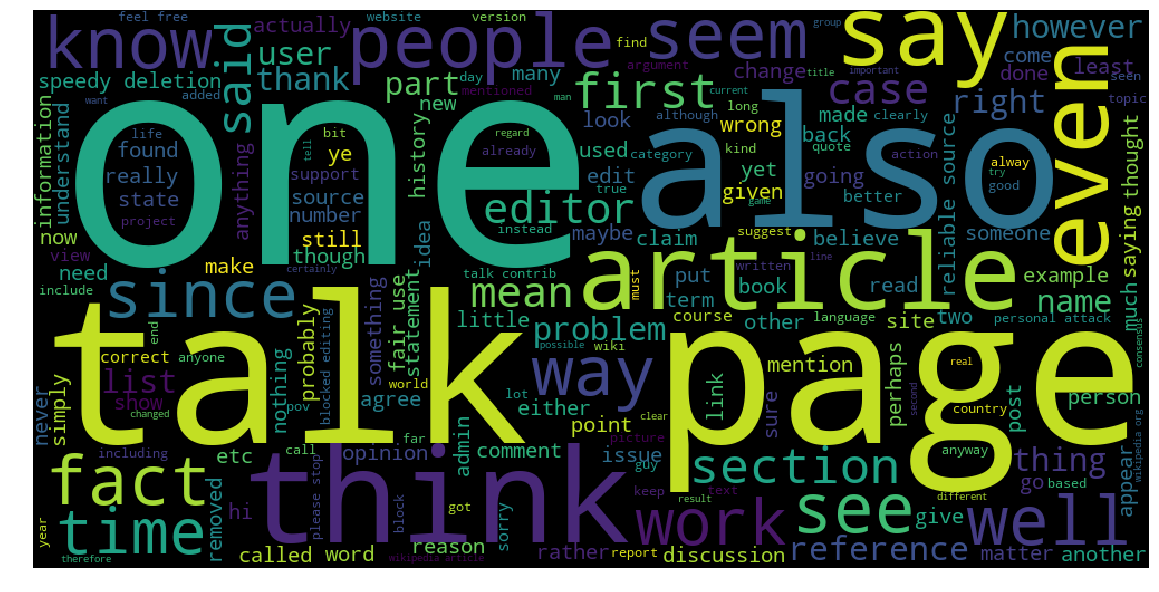

In [9]:
Clean=Train[Train.clean==True]

wordcloud(Clean,'Simple_comment_text')



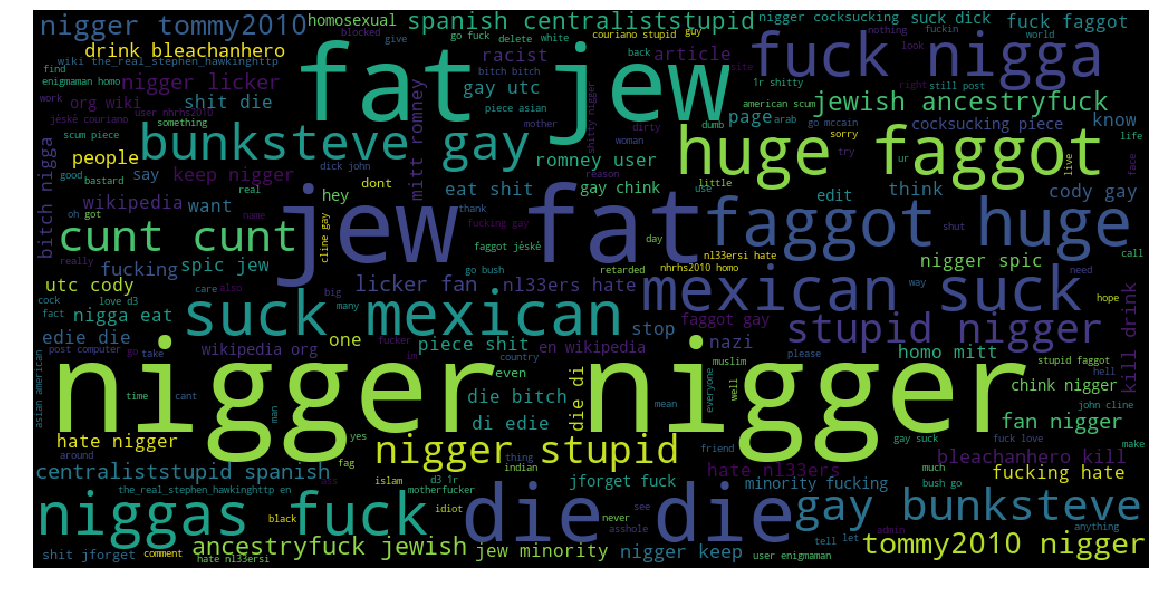

In [10]:
Identity_hate=Train[Train.identity_hate==True]

wordcloud(Identity_hate,'Simple_comment_text')


In [10]:
%%time

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack


#char_vectorizer = TfidfVectorizer(
 #   sublinear_tf=True,
  #  strip_accents='unicode',
   # analyzer='char',
   # stop_words='english',
   # ngram_range=(2, 6),
   # max_features=50000)
#char_vectorizer.fit(Train['Simple_comment_text'])


word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=100000)



word_vectorizer.fit(Train['Simple_comment_text'])

train_word_features = word_vectorizer.transform(Train['Simple_comment_text'])



char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=10000)


char_vectorizer.fit(Train['Simple_comment_text'])

train_char_features = char_vectorizer.transform(Train['Simple_comment_text'])

Train_features= hstack([train_char_features, train_word_features])


Test= pd.read_csv("test.csv")

preprocess(Test,'comment_text')


test_word_features = word_vectorizer.transform(Test['Simple_comment_text'])
test_char_features = char_vectorizer.transform(Test['Simple_comment_text'])



Test_features= hstack([test_char_features, test_word_features])



/home/prasad/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


CPU times: user 8min 16s, sys: 1.6 s, total: 8min 17s
Wall time: 8min 16s


In [11]:
Train.shape

(159571, 17)

In [51]:
%%time

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

scores = []
submission = pd.DataFrame.from_dict({'id': Test['id']})


class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


for class_name in class_names:
    train_target = Train[class_name]
    Logistic_Classifier = LogisticRegressionCV(
        Cs=list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=3
        ,random_state=777
        ,max_iter=10000
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=10
    )
    cv_score = np.mean(cross_val_score(Logistic_Classifier, Train_features, train_target, cv=3, scoring='roc_auc'))
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))
    Logistic_Classifier.fit(Train_features, train_target)
    submission[class_name] = Logistic_Classifier.predict_proba(Test_features)[:, 1]
    submission.to_csv('submission_logistic_with_tuning_new_17mar.csv', index=False)


CV score for class toxic is 0.9762109334686299
CV score for class severe_toxic is 0.9884047784970355
CV score for class obscene is 0.9890774952613747
CV score for class threat is 0.9818974577416787
CV score for class insult is 0.9806729516042797
CV score for class identity_hate is 0.9822936852799419
CPU times: user 42min 27s, sys: 8min 31s, total: 50min 59s
Wall time: 50min 51s


In [33]:
%%time

from sklearn.model_selection import cross_val_score
from sklearn import svm
scores = []


class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


for class_name in class_names:
    train_target = Train[class_name]
    classifier = svm.SVC()

    cv_score = np.mean(cross_val_score(classifier, Train_features, train_target, cv=3, scoring='roc_auc'))
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))


CV score for class toxic is 0.9576297454106455
CV score for class severe_toxic is 0.8940144326935032
CV score for class obscene is 0.9778778764612759
CV score for class threat is 0.925415630476332
CV score for class insult is 0.9624499657698703
CV score for class identity_hate is 0.9059039752031562
CPU times: user 1h 3min 40s, sys: 4.28 s, total: 1h 3min 44s
Wall time: 1h 3min 34s
